In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import savefig

sns.set()

%matplotlib inline

In [2]:
df = pd.read_csv('turnstile_180922.csv')

current_d = datetime.datetime(2018, 9, 22)

In [3]:
# This takes the csv files in the MTA website and concatenates them all into one big dataframe
for i in range(0,3):
    #modify the .csv string
    new_date = current_d - datetime.timedelta(days = 7*(i+1))
    url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_' + new_date.strftime('%y%m%d') + '.txt'
    #modify the df name
    dft = pd.read_csv(url)
    dfs = [df, dft]
    df = pd.concat(dfs)

In [4]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,00:00:00,REGULAR,6759219,2291425
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,04:00:00,REGULAR,6759234,2291429
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,08:00:00,REGULAR,6759251,2291453
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,12:00:00,REGULAR,6759330,2291532
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,16:00:00,REGULAR,6759538,2291574


In [5]:
# Cleaning up column names
df.rename(columns=lambda x: x.strip(),inplace='True')

df.rename(columns={'ENTRIES': 'CUMULATIVE_ENTRIES', 'EXITS': 'CUMULATIVE_EXITS'}, inplace=True)

df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE","TIME"], inplace=True, ascending=False)
df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE","TIME"], inplace=True)

df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,CUMULATIVE_ENTRIES,CUMULATIVE_EXITS
199101,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,21:00:00,REGULAR,5554,348
199100,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,17:00:00,REGULAR,5554,348
199099,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,13:00:00,REGULAR,5554,348
199098,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,09:00:00,REGULAR,5554,348
199097,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,05:00:00,REGULAR,5554,348


In [6]:
# Filtering out all data points at odd times
date = '09/15/2018'
time = '08:00:00'

df4 = df[(df['TIME'] == '00:00:00') | \
          (df['TIME'] == '04:00:00') | \
          (df['TIME'] == '08:00:00') | \
          (df['TIME'] == '12:00:00') | \
          (df['TIME'] == '16:00:00') | \
          (df['TIME'] == '20:00:00')].copy()

df4.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE",'TIME'], inplace=True, ascending=True)

# Calculating net traffic
df4['NET_ENTRIES'] = df4['CUMULATIVE_ENTRIES'].diff()
df4['NET_EXITS'] = df4['CUMULATIVE_EXITS'].diff()
df4['NET_TRAFFIC'] = df4['NET_EXITS'] + df4['NET_ENTRIES']


# Removing outliers
df4 = df4[(df4['NET_ENTRIES'] > 0) & (df4['NET_ENTRIES'] < 10000) & (df4['NET_EXITS'] > 0) & (df4['NET_EXITS'] < 10000)]

# Dropping first row in dataframe
df4[(df4.TIME == '00:00:00') & (df4.DATE == '08/25/2018')] = np.nan
df4.dropna(inplace = True)

# Creating new column for day of the week
df_clean = df4
df_clean["DATE_TIME"] = pd.to_datetime(df_clean.DATE + " " + df_clean.TIME, format="%m/%d/%Y %H:%M:%S")
df_clean['DAY'] = df_clean['DATE_TIME'].apply(lambda x:x.weekday())

df_clean


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,CUMULATIVE_ENTRIES,CUMULATIVE_EXITS,NET_ENTRIES,NET_EXITS,NET_TRAFFIC,DATE_TIME,DAY
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087.0,2283188.0,20.0,4.0,24.0,2018-08-25 04:00:00,5
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105.0,2283229.0,18.0,41.0,59.0,2018-08-25 08:00:00,5
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180.0,2283314.0,75.0,85.0,160.0,2018-08-25 12:00:00,5
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349.0,2283384.0,169.0,70.0,239.0,2018-08-25 16:00:00,5
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,20:00:00,REGULAR,6736562.0,2283425.0,213.0,41.0,254.0,2018-08-25 20:00:00,5
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/26/2018,00:00:00,REGULAR,6736683.0,2283460.0,121.0,35.0,156.0,2018-08-26 00:00:00,6
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/26/2018,04:00:00,REGULAR,6736696.0,2283461.0,13.0,1.0,14.0,2018-08-26 04:00:00,6
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/26/2018,08:00:00,REGULAR,6736705.0,2283483.0,9.0,22.0,31.0,2018-08-26 08:00:00,6
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/26/2018,12:00:00,REGULAR,6736746.0,2283524.0,41.0,41.0,82.0,2018-08-26 12:00:00,6
10,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/26/2018,16:00:00,REGULAR,6736873.0,2283587.0,127.0,63.0,190.0,2018-08-26 16:00:00,6


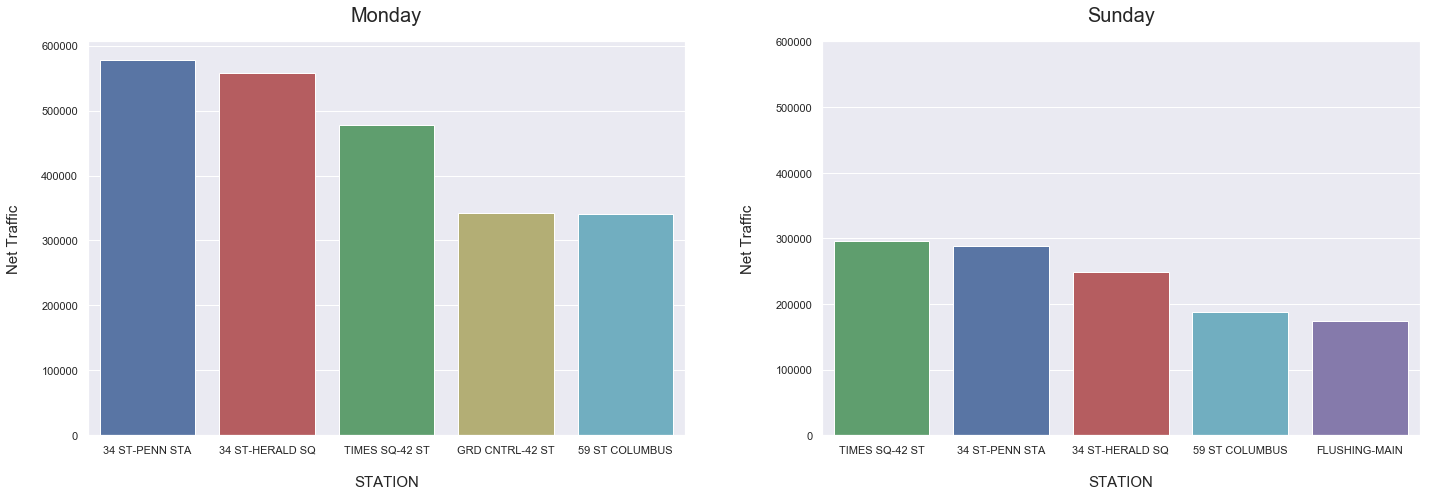

In [9]:
#Add all 8-8 shifts for each day to see which station to send street team
df_worktime = df_clean[(df_clean.TIME == '12:00:00') | \
                       (df_clean.TIME == '16:00:00') | \
                       (df_clean.TIME == '20:00:00')]

days = range(0,7)
df_days_shifts = []
day_dict = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

for day in days:
    df_single_day = df_worktime[df_worktime.DAY == day]
    df_single_day = df_single_day.groupby('STATION').sum().sort_values('NET_TRAFFIC', ascending = False).head()
    df_days_shifts.append(df_single_day)


# Plotting Net Traffic for stations on Monday and on Sunday

fig, axes = plt.subplots(1,2,figsize=(20,7))

# Setting bar chart colors
my_colors = ['b', 'r', 'g', 'darkkhaki', 'c']
my_colors2 = ['g', 'b', 'r', 'c', 'm']

# Monday plot
sns.barplot(y = df_days_shifts[0].NET_TRAFFIC, x = df_days_shifts[0].NET_TRAFFIC.index, ax=axes[0],palette = my_colors)
axes[0].set_title('Monday',fontsize = 20,pad=20)
axes[0].set_xlabel('STATION',fontsize = 15,labelpad = 20)
axes[0].set_ylabel('Net Traffic',fontsize = 15, labelpad = 20)

# Sunday plot
sns.barplot(y = df_days_shifts[6].NET_TRAFFIC, x = df_days_shifts[6].NET_TRAFFIC.index,ax=axes[1],palette = my_colors2)
axes[1].set_title('Sunday',fontsize = 20,pad=20)
axes[1].set_xlabel('STATION',fontsize = 15,labelpad = 20)
axes[1].set_ylabel('Net Traffic',fontsize = 15, labelpad = 20)
axes[1].set_ylim(0,600000)

plt.tight_layout(w_pad=5)

# Save image as a png

plt.savefig('monday_sunday.png')




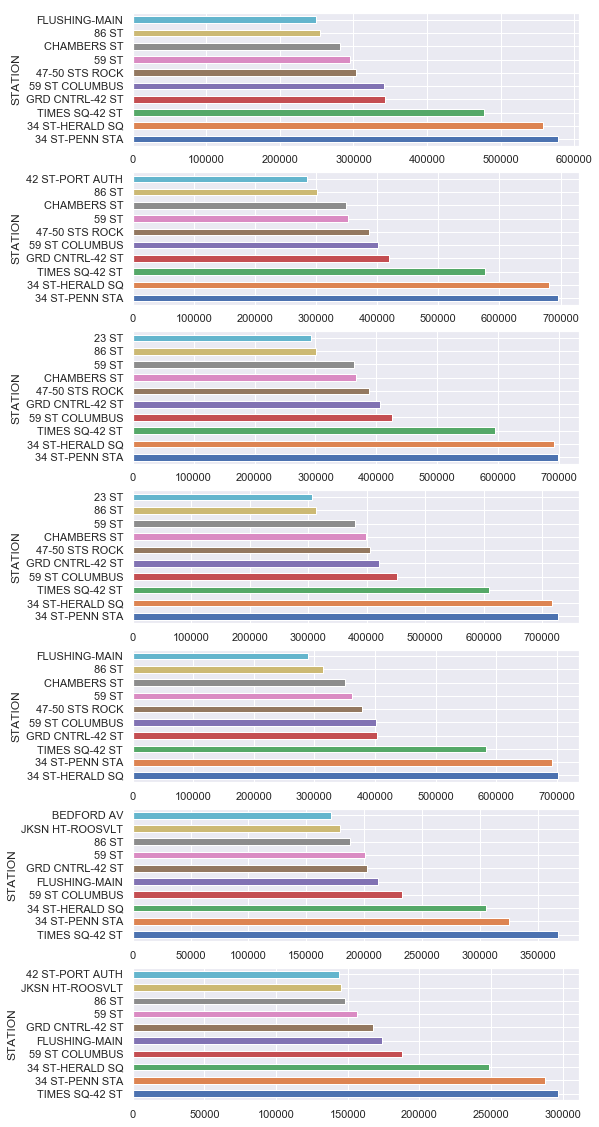

In [17]:
# Plot top stations by traffic for every day of the week, Monday to Sunday
# We didn't present these graphs but we used these to determine which stations to go to if we don't do duplicate stations


df_worktime = df_clean[(df_clean.TIME == '12:00:00') | \
                       (df_clean.TIME == '16:00:00') | \
                       (df_clean.TIME == '20:00:00')]

days = range(0,7)
df_days_shifts = []

for day in days:
    df_single_day = df_worktime[df_worktime.DAY == day]
    df_single_day = df_single_day.groupby('STATION').sum().sort_values('NET_TRAFFIC', ascending = False).head(10)
    df_days_shifts.append(df_single_day)
    
for i, day in enumerate(df_days_shifts):
    plt.subplot(len(days),1,i+1)
    day.NET_TRAFFIC.plot(kind = 'barh', figsize = [8,20])

    

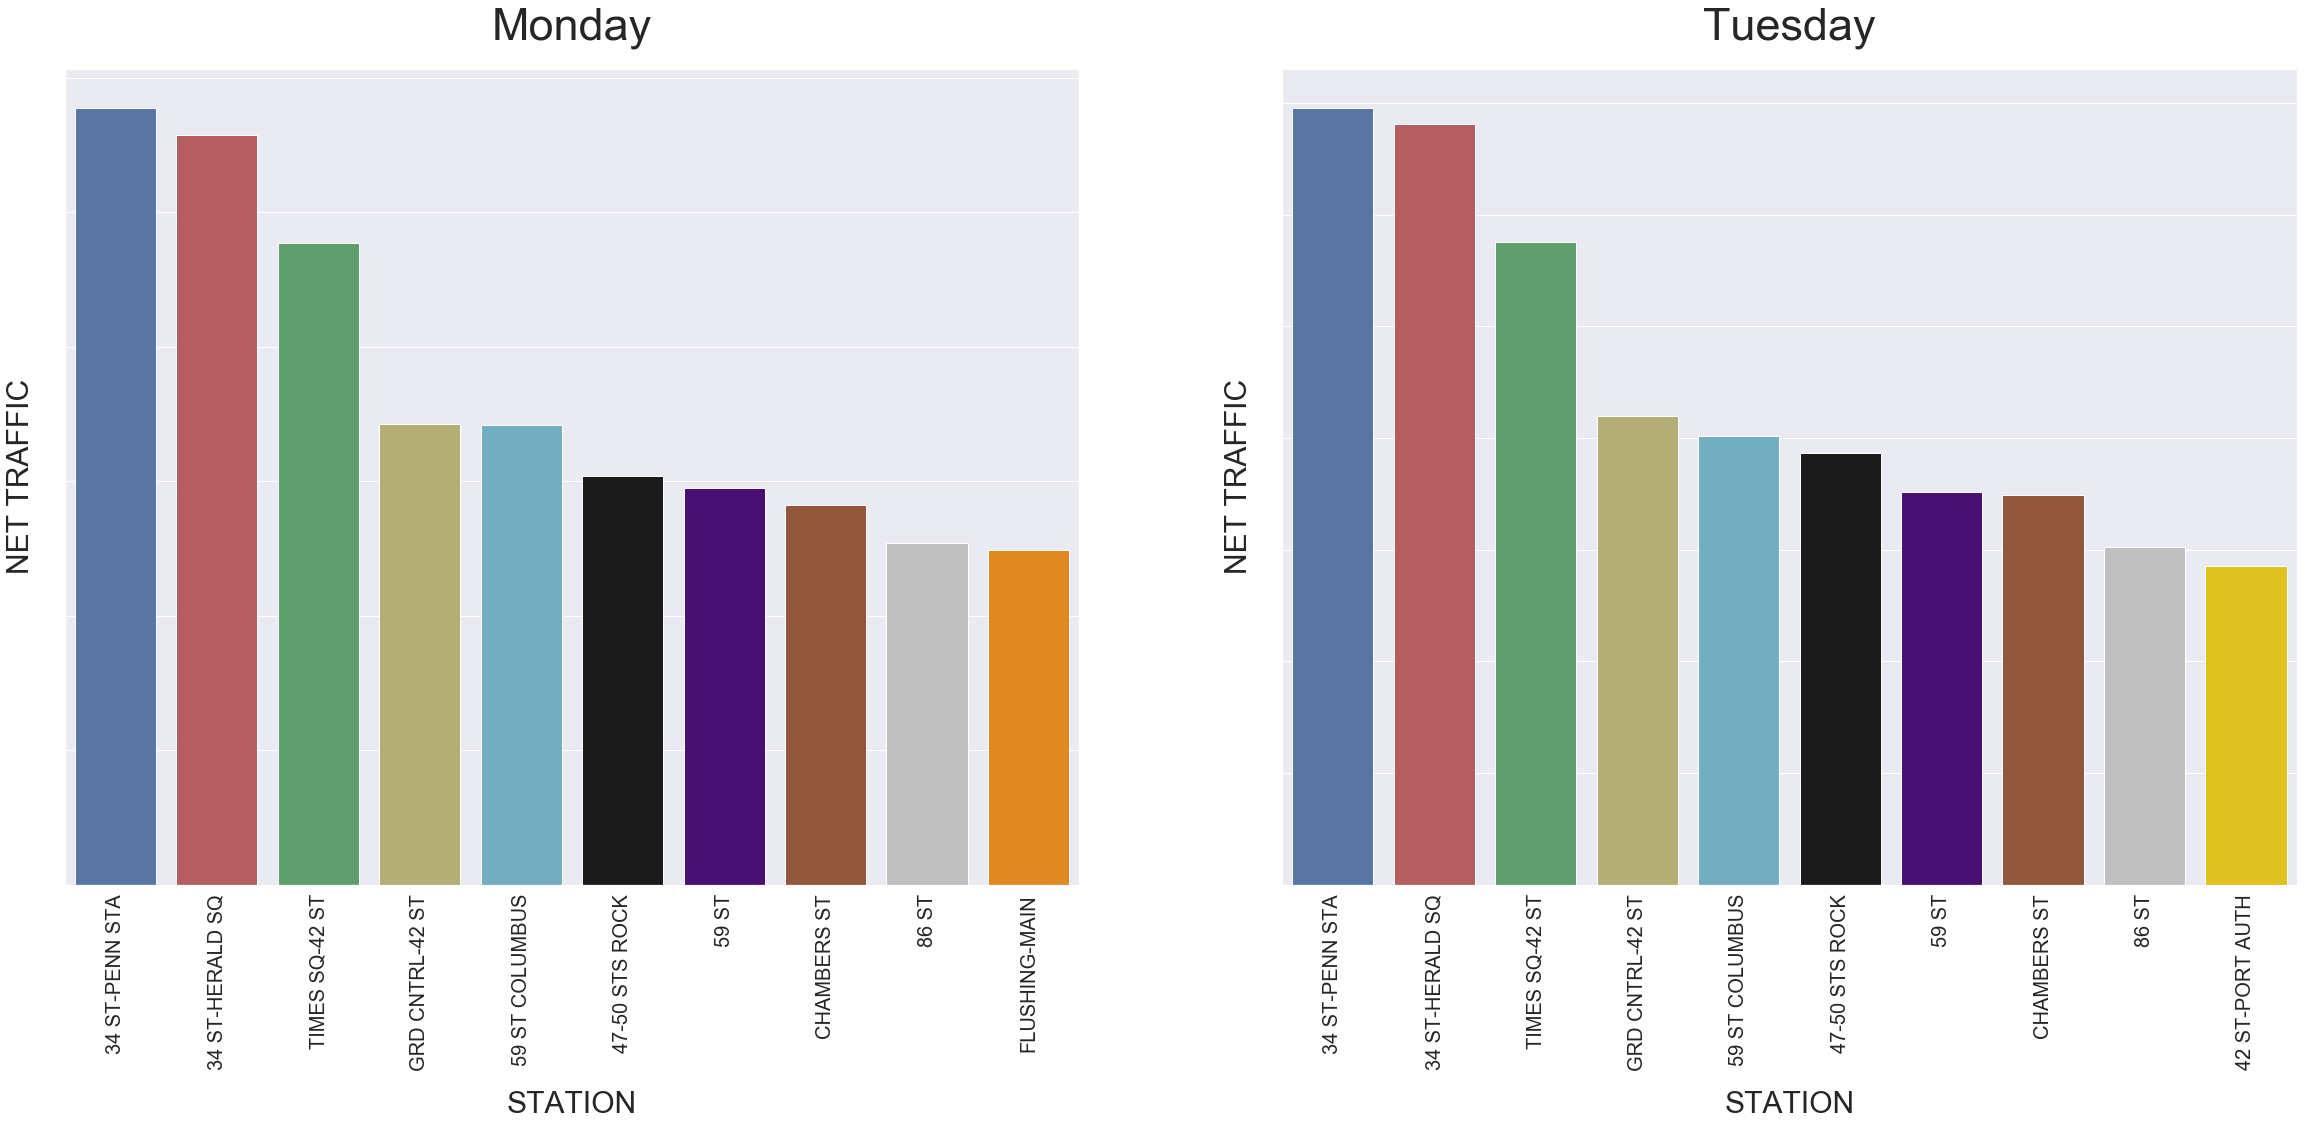

In [18]:
#plotting 2 days of top 10 stations daily, the graph we actually used for the presentation is on the left
day_dict = {0: 'Monday', 1: 'Tuesday'}
fig, axes = plt.subplots(1,2, figsize = (40,15))
palette1 = ['b', 'r', 'g', 'darkkhaki', 'c', 'k', 'indigo', 'sienna', 'silver', 'darkorange'] 
palette2 = palette1[0:9] + ['gold']
palette_list = [palette1, palette2]
for i in range(0,2):
    sns.barplot(df_days_shifts[i].index, df_days_shifts[i].NET_TRAFFIC, ax = axes[i], palette = palette_list[i])
    axes[i].set_title(day_dict[i], fontsize = 45, pad = 30)
    axes[i].set_xlabel('STATION', fontsize = 30, labelpad = 20)
    axes[i].set_ylabel('NET TRAFFIC', fontsize = 30, labelpad = 20)
    axes[i].set_xticklabels(df_days_shifts[i].index, rotation = 90, fontsize = 20)
    axes[i].set_yticklabels([])
    
plt.savefig('no_duplicate_station.svg', bbox_inches="tight")

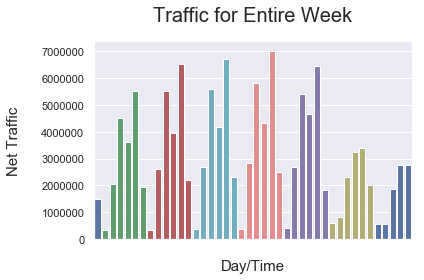

In [19]:
# Plotting total traffic across all stations throughout the week

mon = df_clean.groupby(['DAY','TIME']).sum()
seven_colors = {0:'b',1:'g',2:'r',3:'c',4:'aqua',5:'m',6:'darkkhaki'}

# Creating list for bar chart colors so that each day has a different color.

color_list = []
color_list.append('b')

for i in range(6):
    color_list.append('g')
    
for i in range(6):
    color_list.append('r')

for i in range(6):
    color_list.append('c')

for i in range(6):
    color_list.append('lightcoral')
    
for i in range(6):
    color_list.append('m')
    
for i in range(6):
    color_list.append('darkkhaki')
    
for i in range(5):
    color_list.append('b')

# plotting the figure with the colors above
fig = sns.barplot(x=mon.NET_TRAFFIC.index,y=mon.NET_TRAFFIC,palette = color_list)
fig.set_title('Traffic for Entire Week',fontsize = 20,pad=20)
fig.set_xlabel('Day/Time',fontsize = 15,labelpad = 20)
fig.set_ylabel('Net Traffic',fontsize = 15, labelpad = 20)

fig.set(xticks = [])
plt.tight_layout(w_pad=3)

plt.savefig('weekly_traffic.pdf')
plt.savefig('weekly_traffic.svg')



In [20]:
# finding the top 10 stations overall, adding up all traffic in the dataframe
df_clean.groupby(['STATION']).sum().sort_values('NET_TRAFFIC', ascending = False).head()

,CUMULATIVE_ENTRIES,CUMULATIVE_EXITS,NET_ENTRIES,NET_EXITS,NET_TRAFFIC,DAY
STATION,,,,,,
34 ST-PENN STA,2.619494e+11,2.695862e+11,2642726.0,2478568.0,5121294.0,34564
34 ST-HERALD SQ,2.569999e+11,2.227399e+11,2522941.0,2335422.0,4858363.0,23785
TIMES SQ-42 ST,6.528509e+11,2.991776e+11,2400652.0,2260549.0,4661201.0,23052
59 ST COLUMBUS,5.303945e+11,4.908480e+11,1727759.0,1365626.0,3093385.0,17150
GRD CNTRL-42 ST,1.248368e+11,1.114122e+11,1707389.0,1263147.0,2970536.0,12379


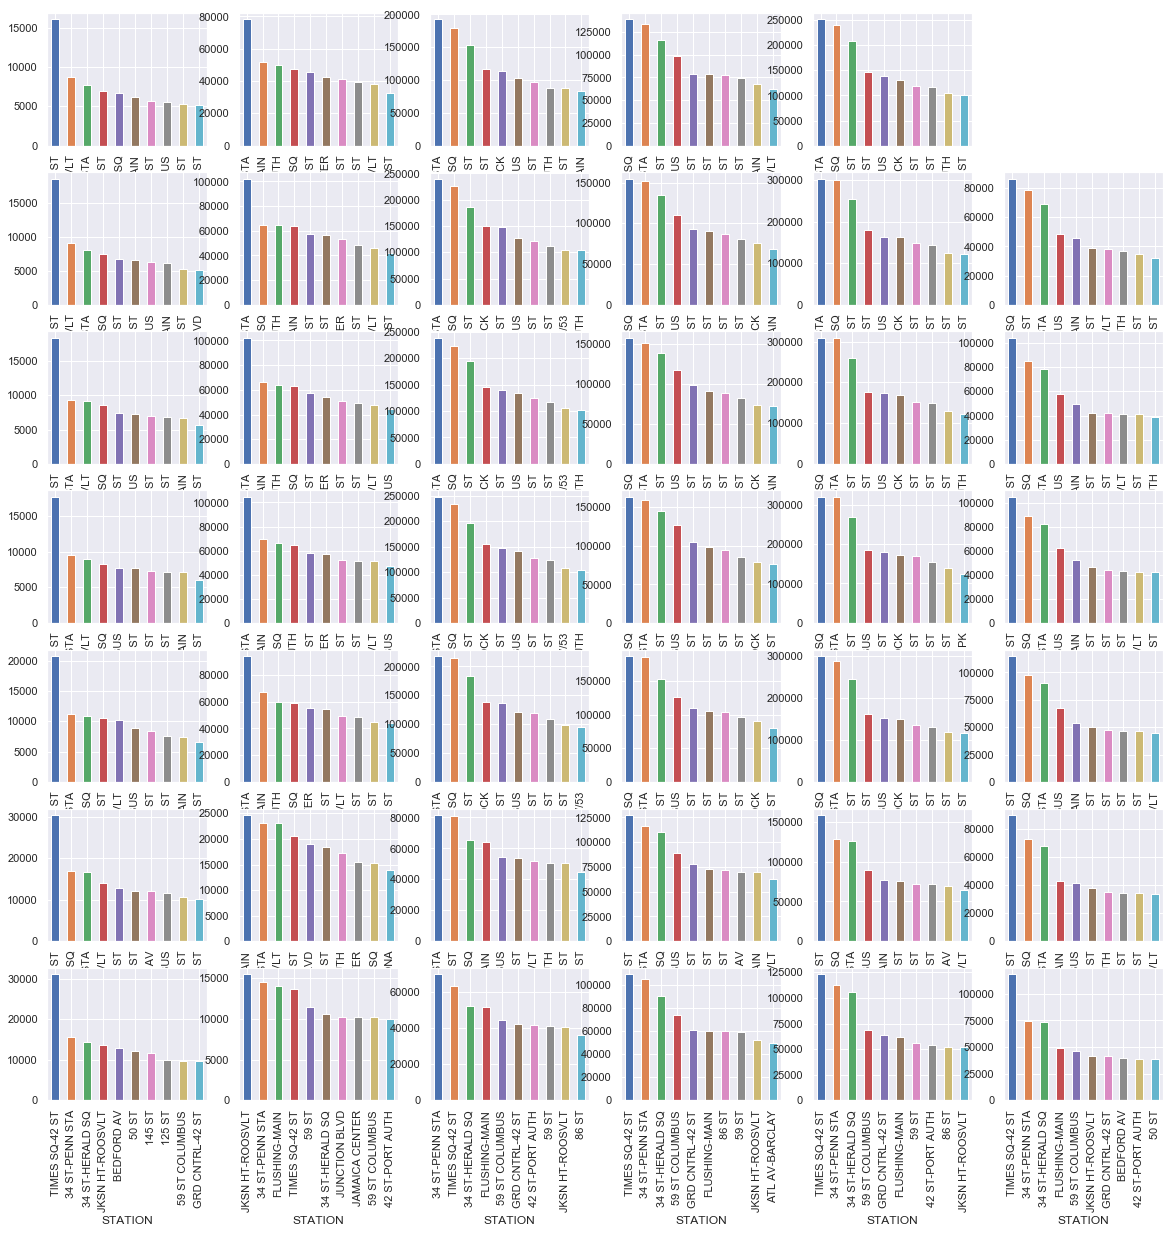

In [21]:
# some additional code we used when doing exploratory data analysis

# #find all stations in one specific time

# date_list = list(df_clean.DATE.unique())
# time_list = list(df_clean.TIME.unique())
# day_list = range(0,7)

# all_shifts_series = []
# all_shifts_df = []


# # list of 12 hour period traffic for each day   
# for day in day_list:
#     for time in time_list:
#             df_one = df_clean[(df_clean.DAY == day) & (df_clean.TIME == time)]
#             df_one = df_one.groupby('STATION').sum().sort_values('NET_TRAFFIC', ascending = False)
#             df_one = df_one.head(10)
#             all_shifts_df.append(df_one)
#             df_two = df_one.NET_TRAFFIC
#             all_shifts_series.append(df_two)
            
# #plots all days and shifts

# for n_day in range(0,len(day_list)):
#     for n_time in range (0,6):
#         plot_num = n_day*6 + n_time + 1
#         if plot_num == 6:
#             break
#         plt.subplot(7, 6, plot_num)
#         all_shifts_df[plot_num - 1].NET_TRAFFIC.plot(kind = 'bar', figsize = [20,20])


become master of plotting stuff